In [227]:
import pandas as pd
import numpy as np
import tables as tb
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import sys
from datetime import datetime
from scipy.optimize import curve_fit

In [348]:
# RUN="14180"
# RUN="13850"
# RUN="13859"
# RUN="14498"
RUN="14780"

# Argon Runs
if (RUN == "14180" or RUN == "13850"):
    cathode_cut = 797
    nbins = 10
    bound_params = 600, 500, 0.3
    q0_low = 2.5e3
    low_charge_lim = 6e3

elif (RUN == "13859"):
    cathode_cut = 755
    nbins = 10
    bound_params = 6.25e5, 0.6e6, 1500 
    q0_low = 2.5e3
    low_charge_lim = 6e3

# Xenon Runs
elif (RUN == "14498"):
    cathode_cut = 1275
    nbins = 10
    bound_params = 600, 800, 0.3
    q0_low = 2.5e3
    low_charge_lim = 6e3


elif (RUN == "14780"):
    cathode_cut = 1335
    nbins = 10
    bound_params = 600, 800, 0.3
    q0_low = 2.5e3
    low_charge_lim = 6e3

print("The run is:", RUN)

The run is: 14780


In [349]:
file = f"../data/analysis/Run_{RUN}_Filtered.h5"

# Load the data
data_properties = pd.read_hdf(file, "data_properties")

# Convert 'event' columns to integers
data_properties['event'] = data_properties['event'].astype(int)

# Get event_ids where 'x' or 'y' has NaN values
nan_event_ids = data_properties[data_properties['x'].isna()]['event'].values
nan_event_ids = np.append(nan_event_ids, data_properties[data_properties['y'].isna()]['event'].values)

nan_event_ids = np.append(nan_event_ids, data_properties[data_properties['cath_time'].isna()]['event'].values)

# Filter out rows in data and data_properties based on the 'event' column
data_properties = data_properties[~data_properties['event'].isin(nan_event_ids)]

# data_properties["S2_area"] = data_properties["S2_areafit"]

# Check if there are still NaN values
print(data_properties.isna().sum())

display(data_properties)
print(len(data_properties.event.unique()))

event              0
S2_area            0
S2_areafit         0
S2_time            0
cath_area          0
cath_time          0
cath_std           4
ts_raw             0
deltaT             0
sigma              0
S2_amp             0
x                  0
y                  0
grass_peaks        0
nS1                0
mean_interp_amp    0
std_interp_amp     0
ts                 0
dtype: int64


,event,S2_area,S2_areafit,S2_time,cath_area,cath_time,cath_std,ts_raw,deltaT,sigma,S2_amp,x,y,grass_peaks,nS1,mean_interp_amp,std_interp_amp,ts
0,195806,2314.354133,2359.781441,1608.626517,0.443927,1693.691667,37.807753,1.738347e+09,1217.975,5.795376,167.963204,257.775,368.825,0,1,0.015254,0.014377,2025-01-31 12:14:31.260
1,195813,20169.723504,20698.830224,1606.948799,0.328704,1705.748214,23.134339,1.738347e+09,170.725,2.597777,3107.526106,396.725,122.025,0,1,-0.192974,0.865426,2025-01-31 12:14:31.604
2,195820,24720.512704,24518.361359,1614.259374,1.265409,1708.081818,30.009613,1.738347e+09,-999.000,5.666098,1753.284624,-3.575,-170.925,1,1,0.144451,0.106407,2025-01-31 12:14:32.050
3,195827,20397.146511,20300.702497,1614.934935,1.334998,1704.347368,30.625936,1.738347e+09,1349.775,6.436403,1273.644581,212.125,-263.225,0,1,0.138784,0.097596,2025-01-31 12:14:32.470
4,195834,4974.663203,4980.856865,1611.575410,0.290227,1690.197500,34.231627,1.738347e+09,849.900,5.399541,375.287093,-343.675,-294.825,0,1,0.037320,0.026400,2025-01-31 12:14:32.774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,88608,3457.108545,3720.684220,1606.998419,0.907388,1720.468421,36.101040,1.738342e+09,-999.000,7.183175,180.350591,412.275,-62.575,38,2,0.175976,0.120446,2025-01-31 10:40:18.170
58,88615,2321.775044,2791.988901,1605.651019,0.261701,1697.568000,30.059962,1.738342e+09,-999.000,12.394587,95.434975,304.425,184.225,6,4,0.180363,0.124916,2025-01-31 10:40:18.556
59,88622,23537.787432,23550.537399,1618.316411,1.150429,1702.725000,22.926821,1.738342e+09,-999.000,7.069335,1338.793415,443.375,-48.025,0,5,0.171329,0.120529,2025-01-31 10:40:19.186
60,88629,6522.530793,6495.140605,1613.058849,0.542545,1693.613158,19.137281,1.738342e+09,-999.000,6.608150,418.131390,-265.925,-78.125,0,6,0.048180,0.033636,2025-01-31 10:40:19.490


32539


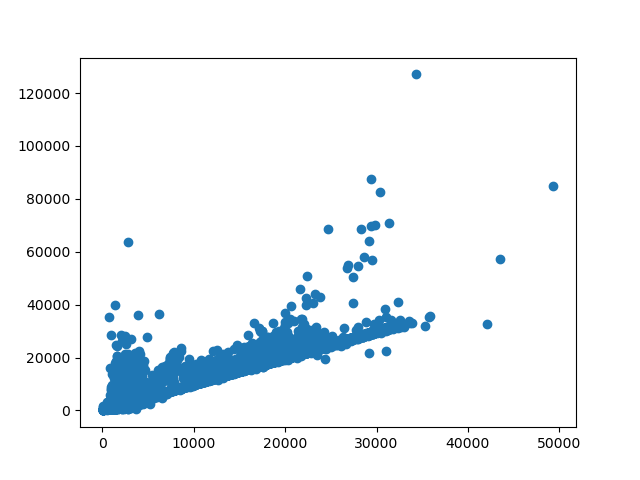

In [350]:
plt.figure()
plt.scatter(data_properties.S2_area, data_properties.S2_areafit)
# plt.scatter(data_properties.deltaT, data_properties.S2_area)

In [351]:
# Rebin the x and y

# Define bin edges using np.linspace for x and y
x_bins = np.linspace(-500, 500, nbins)  # 10 evenly spaced bins between -500 and 500
y_bins = np.linspace(-500, 500, nbins)

# Bin the x and y columns
data_properties['x_bin'] = pd.cut(data_properties['x'], bins=x_bins, labels=False)  # Labels as index (0, 1, 2,...)
data_properties['y_bin'] = pd.cut(data_properties['y'], bins=y_bins, labels=False)

# Calculate bin centers
x_bin_centers = (x_bins[:-1] + x_bins[1:]) / 2  # Bin centers for x
y_bin_centers = (y_bins[:-1] + y_bins[1:]) / 2  # Bin centers for y

print(data_properties['x_bin'].unique())
print(len(data_properties['x_bin'].unique()))

# Assign the bin centers as new columns
data_properties['x_bin_center'] = data_properties['x_bin'].map(lambda i: x_bin_centers[i] if pd.notna(i) else np.nan)
data_properties['y_bin_center'] = data_properties['y_bin'].map(lambda i: y_bin_centers[i] if pd.notna(i) else np.nan)

# Assign a unique bin ID for each (x_bin, y_bin) pair
data_properties['bin_id'] = data_properties['x_bin'].astype(str) + '_' + data_properties['y_bin'].astype(str)

display(data_properties)

[6 8 4 1 2 7 5 3 0]
9


,event,S2_area,S2_areafit,S2_time,cath_area,cath_time,cath_std,ts_raw,deltaT,sigma,...,grass_peaks,nS1,mean_interp_amp,std_interp_amp,ts,x_bin,y_bin,x_bin_center,y_bin_center,bin_id
0,195806,2314.354133,2359.781441,1608.626517,0.443927,1693.691667,37.807753,1.738347e+09,1217.975,5.795376,...,0,1,0.015254,0.014377,2025-01-31 12:14:31.260,6,7,222.222222,333.333333,6_7
1,195813,20169.723504,20698.830224,1606.948799,0.328704,1705.748214,23.134339,1.738347e+09,170.725,2.597777,...,0,1,-0.192974,0.865426,2025-01-31 12:14:31.604,8,5,444.444444,111.111111,8_5
2,195820,24720.512704,24518.361359,1614.259374,1.265409,1708.081818,30.009613,1.738347e+09,-999.000,5.666098,...,1,1,0.144451,0.106407,2025-01-31 12:14:32.050,4,2,0.000000,-222.222222,4_2
3,195827,20397.146511,20300.702497,1614.934935,1.334998,1704.347368,30.625936,1.738347e+09,1349.775,6.436403,...,0,1,0.138784,0.097596,2025-01-31 12:14:32.470,6,2,222.222222,-222.222222,6_2
4,195834,4974.663203,4980.856865,1611.575410,0.290227,1690.197500,34.231627,1.738347e+09,849.900,5.399541,...,0,1,0.037320,0.026400,2025-01-31 12:14:32.774,1,1,-333.333333,-333.333333,1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,88608,3457.108545,3720.684220,1606.998419,0.907388,1720.468421,36.101040,1.738342e+09,-999.000,7.183175,...,38,2,0.175976,0.120446,2025-01-31 10:40:18.170,8,3,444.444444,-111.111111,8_3
58,88615,2321.775044,2791.988901,1605.651019,0.261701,1697.568000,30.059962,1.738342e+09,-999.000,12.394587,...,6,4,0.180363,0.124916,2025-01-31 10:40:18.556,7,6,333.333333,222.222222,7_6
59,88622,23537.787432,23550.537399,1618.316411,1.150429,1702.725000,22.926821,1.738342e+09,-999.000,7.069335,...,0,5,0.171329,0.120529,2025-01-31 10:40:19.186,8,4,444.444444,0.000000,8_4
60,88629,6522.530793,6495.140605,1613.058849,0.542545,1693.613158,19.137281,1.738342e+09,-999.000,6.608150,...,0,6,0.048180,0.033636,2025-01-31 10:40:19.490,2,3,-222.222222,-111.111111,2_3


In [352]:
print(len(nan_event_ids))
data_properties.describe()
tc=25e-3

0


Text(0.5, 1.0, 'RUN 14780')

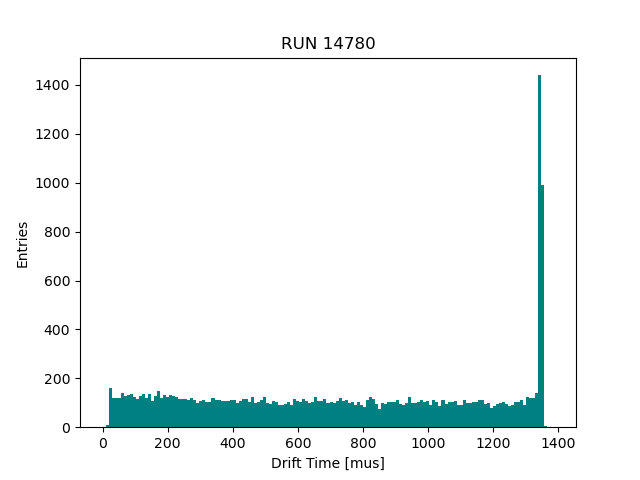

In [353]:
%matplotlib widget
plt.figure()

plt.hist(data_properties.deltaT, bins = np.linspace(0, cathode_cut+50, 150), color = "Teal");
plt.xlabel("Drift Time [mus]")
plt.ylabel("Entries")
plt.title(f"RUN {RUN}")


False


Text(0, 0.5, 'Y [mm]')

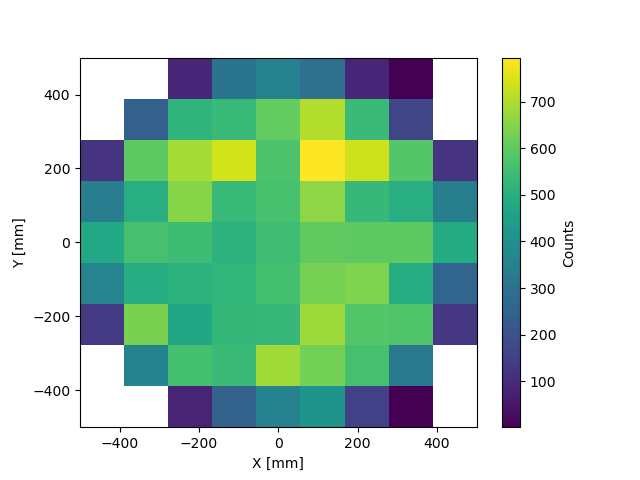

In [354]:
%matplotlib widget
fig, ax = plt.subplots()
has_nan = data_properties['x'].isna().any()
print(has_nan)

hist, xedges, yedges = np.histogram2d(data_properties.x, data_properties.y, bins=[np.linspace(-500,500,nbins),np.linspace(-500,500,nbins)])

# 2. Mask zero bins
masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

# 3. Create a custom colormap with white for the masked values (zero bins)
cmap = plt.cm.viridis  # Choose a colormap you like
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# 4. Plot the 2D histogram

pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")



In [355]:
data_properties_active = data_properties[ (data_properties.deltaT > 0) & (data_properties.deltaT < cathode_cut)]

data_properties_active = data_properties_active[data_properties_active["S2_area"] < 3e7]

22563.149120545502
5_3 22884.04094742164 142.78645099937475


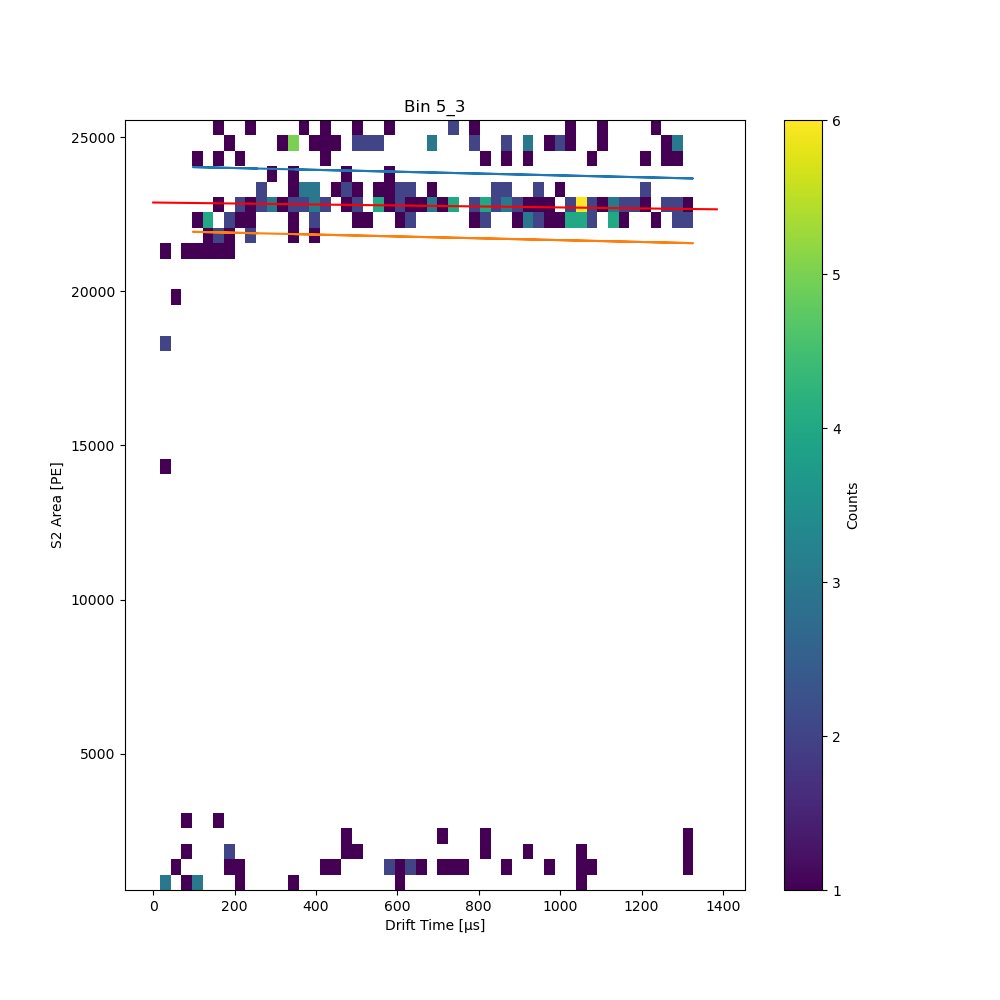

In [356]:
bound_params = 600, 1500, 0.3

# Define the exponential decay function
def exp_decay(t, q, tau):
    if (tau == 0):
        return np.ones(len(t))
    else:
        return q * np.exp(-t / tau)

def FitLifetime(df, binid):

    # Filter data based on the current bin_id
    df_bin = df[df.bin_id == binid] 

    # Get the histogram with the most counts to find the main alpha peak
    counts, bin_edges = np.histogram(df_bin.S2_area, bins=50) 
    max_bin_index = np.argmax(counts)  # Index of the bin with the most counts
    max_bin_value = bin_edges[max_bin_index]  # Left edge of the bin with the most counts
    print(max_bin_value)

    lower_bound = max_bin_value-bound_params[0]
    upper_bound = max_bin_value+bound_params[1]

    # lower_bound = 6e3
    # upper_bound = 7.1e3

    # print("Max bin value is:", max_bin_value)
    # print("Lower/upper bound is:", lower_bound, upper_bound)

    df_bin = df_bin[ (df_bin.S2_area > -bound_params[2]*df_bin.deltaT+lower_bound) & (df_bin.S2_area < -bound_params[2]*df_bin.deltaT+upper_bound)  ]

    if (len(df_bin) < 15):
        return 0, 0

    # Make 2D hist for binning
    hist, x_edges, y_edges = np.histogram2d(df_bin['deltaT'], df_bin['S2_area'], bins=100)

    t = np.linspace(0,cathode_cut+50,300)
    plt.plot(df_bin['deltaT'], -bound_params[2]*df_bin.deltaT+upper_bound) # if you want to plot the bands plot this. 
    plt.plot(df_bin['deltaT'], -bound_params[2]*df_bin.deltaT+lower_bound)

    # plt.plot(df_bin['deltaT'], -0.3*df_bin.deltaT+7.2e3) # if you want to plot the bands plot this. 
    # plt.plot(df_bin['deltaT'], -0.3*df_bin.deltaT+6.5e3)
    
    # Perform the curve fit
    params, covariance = curve_fit(exp_decay, df_bin.deltaT, df_bin.S2_area, bounds = ([q0_low, 1e3], [5e4, 150e3]))


    # Extract the fitted parameters
    q_fit, tau_fit = params
    print(binid, q_fit, tau_fit/1e3 )

    return q_fit, tau_fit

fig, ax = plt.subplots(1, 1, figsize=(nbins, nbins))

# Filter data based on the current bin_id
bin_ = "5_3"
df_bin = data_properties_active[data_properties_active.bin_id == bin_] # 4_5, 

# Create 2D histogram
hist, x_edges, y_edges = np.histogram2d(df_bin['deltaT'], df_bin['S2_area'], bins=50)

# Mask zero bins
masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

# Custom colormap
cmap = plt.cm.viridis
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# Plot with pcolormesh
pcm = ax.pcolormesh(x_edges, y_edges, masked_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Set labels
ax.set_xlabel("Drift Time [μs]")
ax.set_ylabel("S2 Area [PE]")
ax.set_title(f"Bin {bin_}")
# ax.set_ylim(2.5e8,4.5e8)

# # Generate fitted curve
t_fit = np.linspace(0, cathode_cut+50, 100)

q_fit, tau_fit = FitLifetime(data_properties_active, bin_)
hist_fit = exp_decay(t_fit, q_fit, tau_fit)

# # Plotting the fitted exponential decay curve
ax.plot(t_fit, hist_fit, 'r-', label=f'Fit: q={q_fit:.2f}, tau={tau_fit:.2f}')



/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_61641/2790404921.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis").copy()


0.0
0.0
17350.724929934702
19869.59039801133
3_8 20286.493226112638 32.966553865879774
19070.494183253613
4_8 19523.868689980372 149.99999999996496
17594.09042979736
5_8 18143.574609964926 149.99999999999923
17505.998550765333
12064.175292185122
0.0
0.0
20334.853421039203
1_7 20747.707128054823 149.99999999999997
20795.31209616495
2_7 21375.447642994295 47.161465008011454
21317.97717961986
3_7 21793.928259966695 59.00848265929828
21507.97605386424
4_7 21981.00898296062 43.45725888268017
21045.825407143253
5_7 21638.28029632213 46.037680686402695
19721.974228361916
6_7 20144.08344377387 54.866066417414245
18220.525598221648
7_7 18723.041690046644 113.39688758976784
0.0
1508.8410688303225
20331.589333326327
1_6 20886.986555000633 87.64319416624413
21735.150227053295
2_6 22220.057468396764 60.74737505971915
21966.61276569042
3_6 22583.552820852303 87.357409697495
21770.534309408165
4_6 22441.673317127847 83.90168587831671
21412.276597850712
5_6 22208.611638492574 56.5278907207649
20664.39

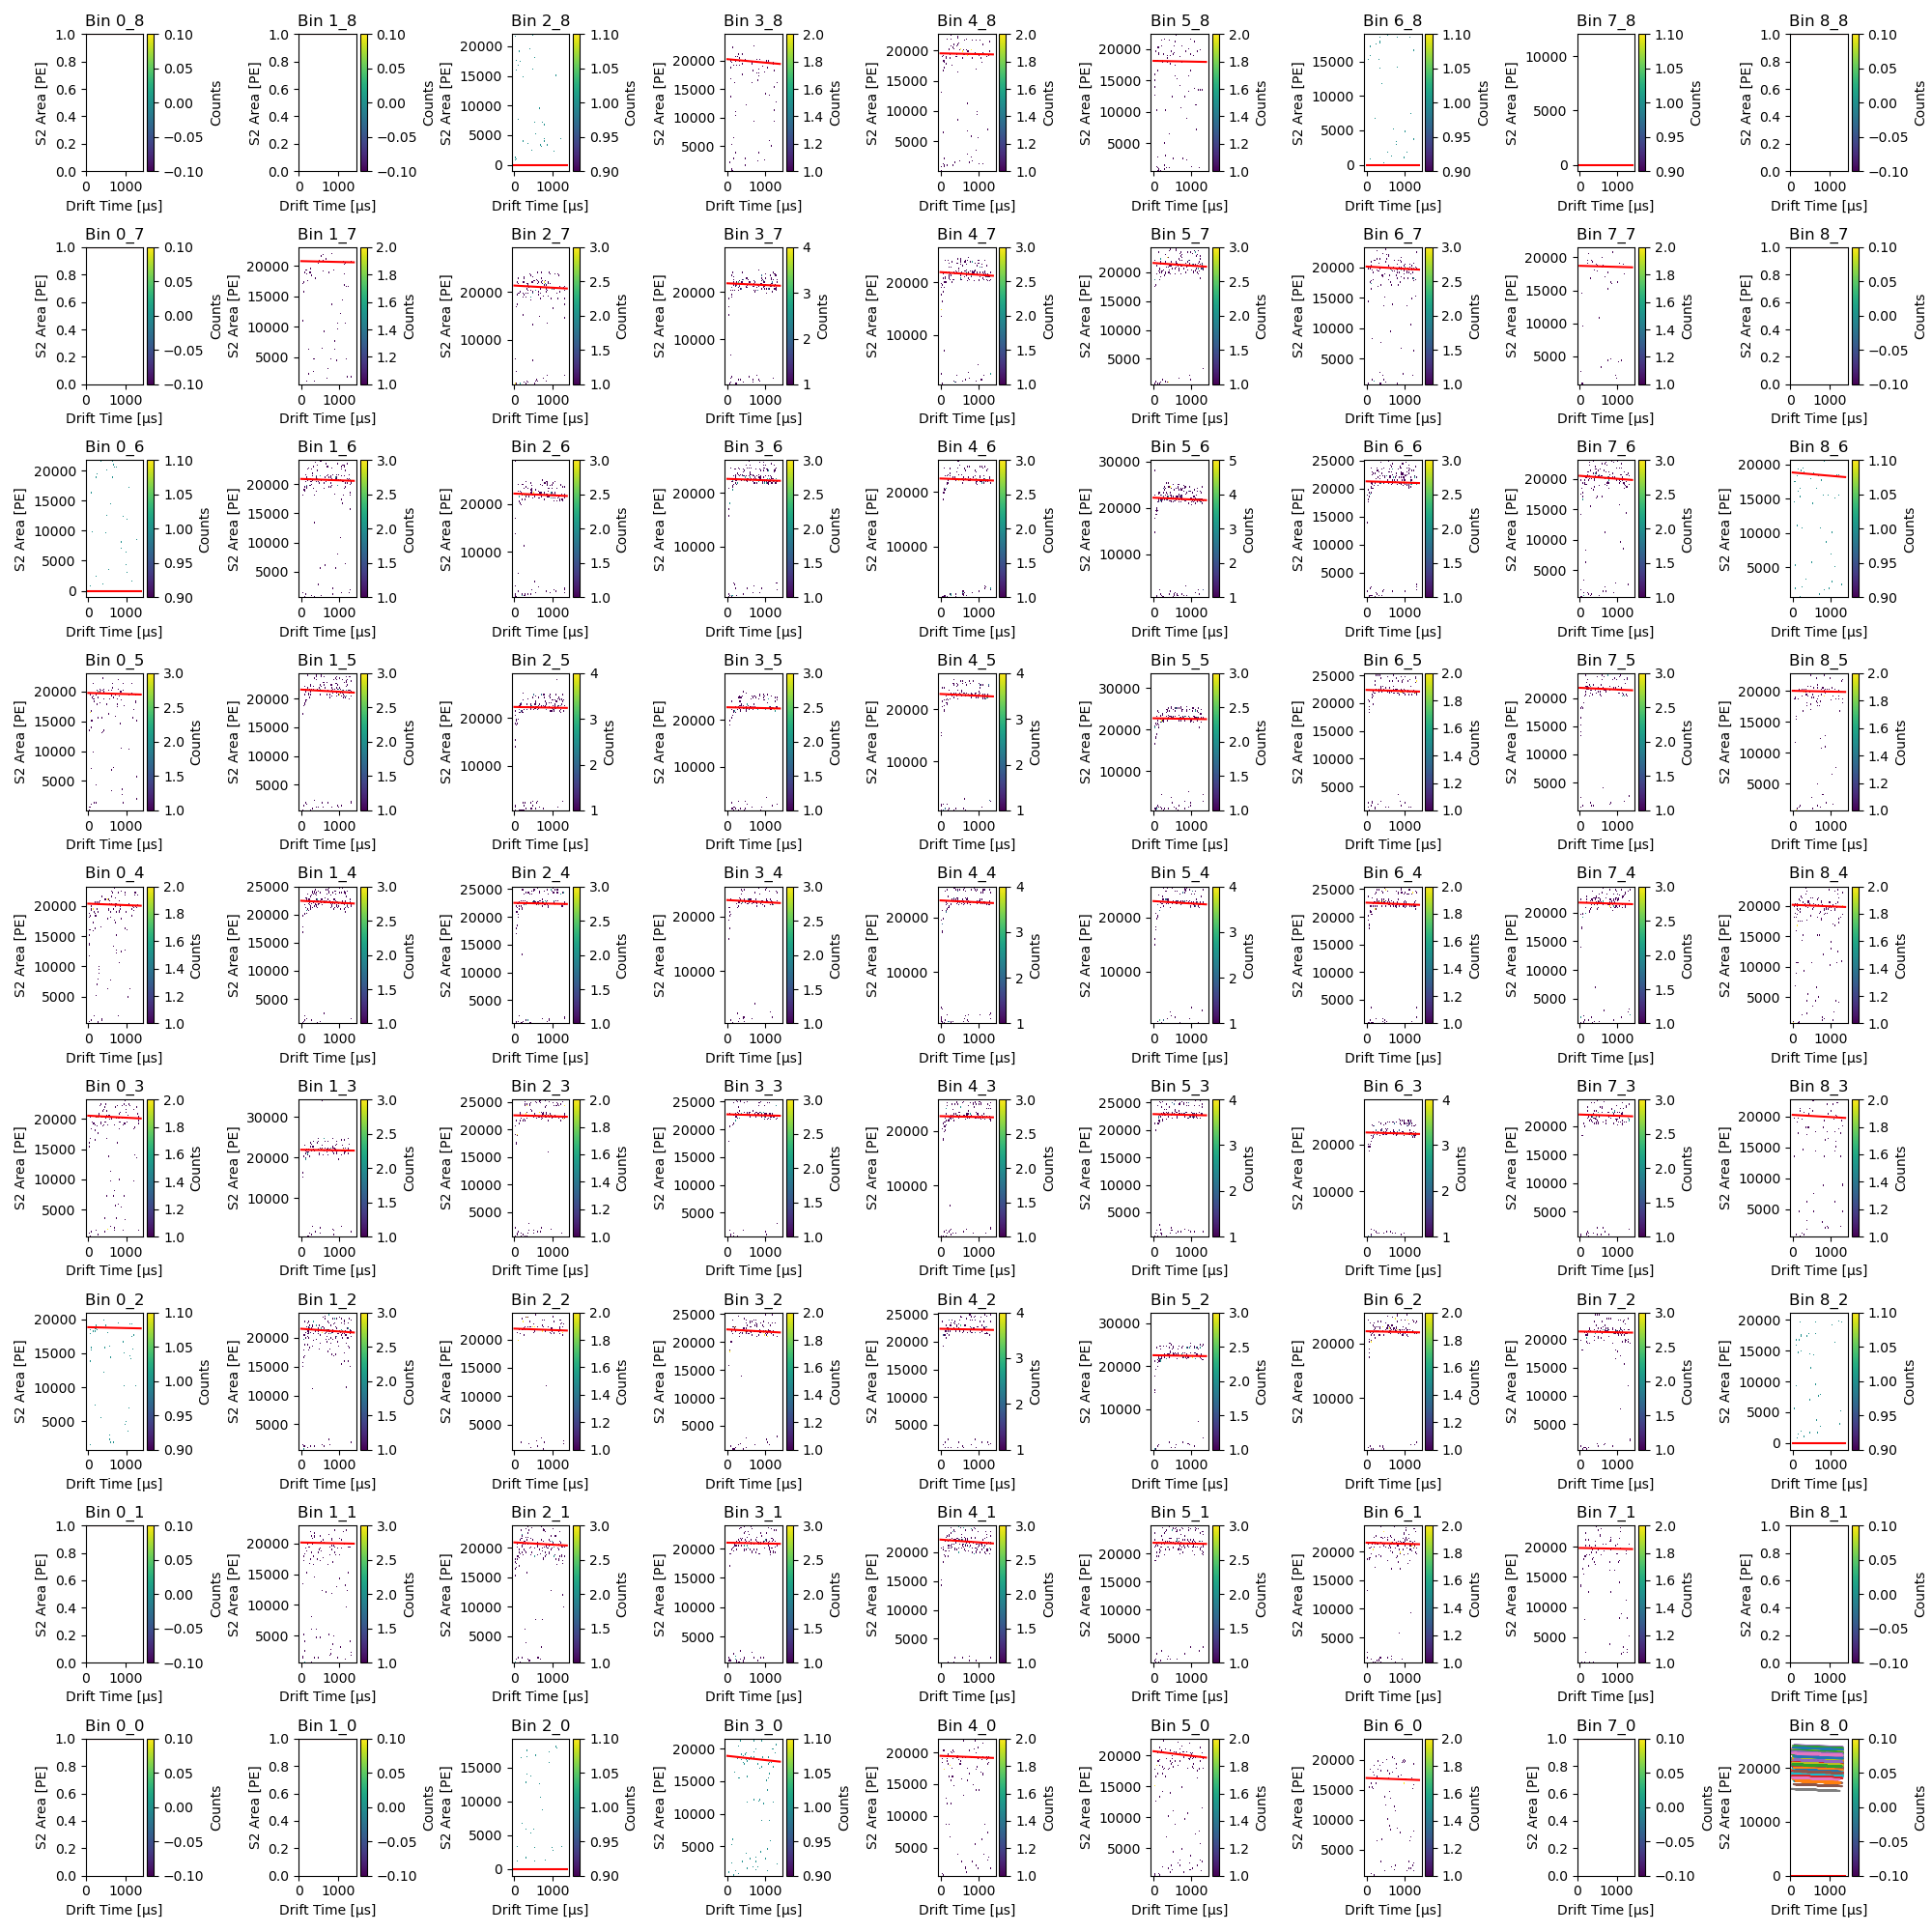

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_61641/2790404921.py:84: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['bin_id', 'lt', 'q0'], dtype='object')]

  lifetime_df.to_hdf(f"../maps/LifetimeMap_Run_{RUN}.h5", key='map', mode='w')


In [361]:
# Make a plot of the time vs peak width

data_properties_active['sigma'] = data_properties_active['sigma'].fillna(0)
data_properties_active['S2_amp'] = data_properties_active['S2_amp'].fillna(-1)
data_properties_active = data_properties_active[data_properties_active.S2_amp > 0]

data_properties['sigma'] = data_properties['sigma'].fillna(0)
data_properties['S2_amp'] = data_properties['S2_amp'].fillna(-1)
data_properties = data_properties[data_properties.S2_amp > 0]


# Define the plot function
def plot_lifetime(ax, df, S2var, bin_id):
    # Filter data based on the current bin_id
    df_bin = df[df.bin_id == bin_id]

    # Create 2D histogram
    hist, xedges, yedges = np.histogram2d(df_bin['deltaT'], df_bin[S2var], bins=100)

    # Mask zero bins
    masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

    # Custom colormap
    # cmap = plt.cm.viridis
    cmap = plt.cm.get_cmap("viridis").copy()
    cmap.set_bad(color='white')  # Set masked values (zeros) to white

    # Plot with pcolormesh
    pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

    # Add color bar
    plt.colorbar(pcm, ax=ax, label='Counts')

    # Set labels
    ax.set_xlabel("Drift Time [μs]")
    ax.set_ylabel("S2 Area [PE]")
    ax.set_title(f"Bin {bin_id}")
    # ax.set_ylim(2.5e8,4.5e8)


# Create a grid of subplots (5x5)
fig, axs = plt.subplots(nbins-1, nbins-1, figsize=(20, 20))  # Adjusted figsize for better spacing
axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array for easier indexing

lifetime_df = pd.DataFrame(columns=["bin_id", "lt", "q0"])

# Iterate over the unique bin_id values and corresponding subplot axes
counter = 0
for y in range(nbins-2, -1, -1):
    for x in range(0, nbins-1, 1):
        if counter >= len(axs):
            break  # Avoid indexing beyond available subplots
        
        plot_lifetime(axs[counter], data_properties_active, "S2_area",f"{x}_{y}")

        t_fit = np.linspace(0, cathode_cut+50, 100)

        q_fit, tau_fit = FitLifetime(data_properties_active, f"{x}_{y}")
        hist_fit = exp_decay(t_fit, q_fit, tau_fit)

        # # Plotting the fitted exponential decay curve
        axs[counter].plot(t_fit, hist_fit, 'r-', label=f'Fit: q={q_fit:.2f}, tau={tau_fit:.2f}')

        # Create a new DataFrame to append
        new_data = pd.DataFrame({
            "bin_id": [f"{x}_{y}"],
            "lt": [tau_fit],
            "q0": [q_fit]
        })

        lifetime_df = pd.concat([lifetime_df, new_data], ignore_index=True)

        counter=counter+1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# lifetime_df.loc[lifetime_df['lt'] > 99e3, 'lt'] = 0

# Save the calibration map
lifetime_df.to_hdf(f"../maps/LifetimeMap_Run_{RUN}.h5", key='map', mode='w')


,bin_id,lt,q0,x_center,y_center
0,0_8,0,0,-444.444444,444.444444
1,1_8,0,0,-333.333333,444.444444
2,2_8,0,0,-222.222222,444.444444
3,3_8,32966.553866,20286.493226,-111.111111,444.444444
4,4_8,150000.0,19523.86869,0.000000,444.444444
...,...,...,...,...,...
76,4_0,81960.278859,19456.933435,0.000000,-444.444444
77,5_0,27293.735678,20643.509101,111.111111,-444.444444
78,6_0,70162.63726,16985.545217,222.222222,-444.444444
79,7_0,0,0,333.333333,-444.444444


Text(0.5, 1.0, '14780 Q0')

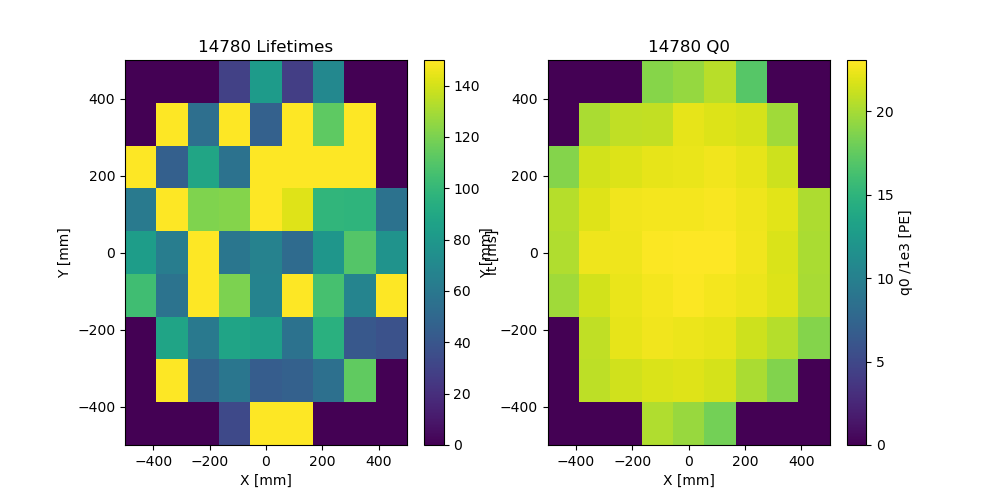

In [363]:
%matplotlib widget

display(lifetime_df)

# Function to extract x and y positions from bin_id
def get_bin_position_from_id(bin_id, x_bin_centers, y_bin_centers):
    try:
        x_bin, y_bin = map(int, bin_id.split('_'))  # Split and convert bin_id to integers
        return x_bin_centers[x_bin], y_bin_centers[y_bin]
    except (ValueError, IndexError) as e:
        return np.nan, np.nan  # Return NaN if there's an issue with the bin_id

# Apply the function to create new columns
lifetime_df_pos= lifetime_df
lifetime_df_pos[['x_center', 'y_center']] = lifetime_df['bin_id'].apply(
    lambda bid: pd.Series(get_bin_position_from_id(bid, x_bin_centers, y_bin_centers))
)


lifetime_df_pos.loc[lifetime_df_pos['lt'] > 200e3, 'lt'] = 0

# Create pivot table to reshape the data for 2D plotting
lt_pivot = lifetime_df_pos.pivot(index='y_center', columns='x_center', values='lt')

# Sort the axes (necessary if bin centers are not in order)
lt_pivot = lt_pivot.sort_index(ascending=False)  # y-axis usually goes from top to bottom
lt_pivot = lt_pivot.astype(float).fillna(0) 

# Create pivot table to reshape the data for 2D plotting
q0_pivot = lifetime_df_pos.pivot(index='y_center', columns='x_center', values='q0')

# Sort the axes (necessary if bin centers are not in order)
q0_pivot = q0_pivot.sort_index(ascending=False)  # y-axis usually goes from top to bottom
q0_pivot = q0_pivot.astype(float).fillna(0) 


# Plotting using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the pcolormesh plot
c = axs[0].pcolormesh(x_bins, y_bins, lt_pivot / 1e3, cmap='viridis', shading='auto')
fig.colorbar(c, ax=axs[0], label='lt [ms]')  # Specify 'ax' to link the color bar to the plot
axs[0].set_xlabel('X [mm]')
axs[0].set_ylabel('Y [mm]')
axs[0].set_title(f'{RUN} Lifetimes')


c = axs[1].pcolormesh(x_bins, y_bins, q0_pivot / 1e3, cmap='viridis', shading='auto')
fig.colorbar(c, ax=axs[1], label='q0 /1e3 [PE]')  # Specify 'ax' to link the color bar to the plot
axs[1].set_xlabel('X [mm]')
axs[1].set_ylabel('Y [mm]')
axs[1].set_title(f'{RUN} Q0')


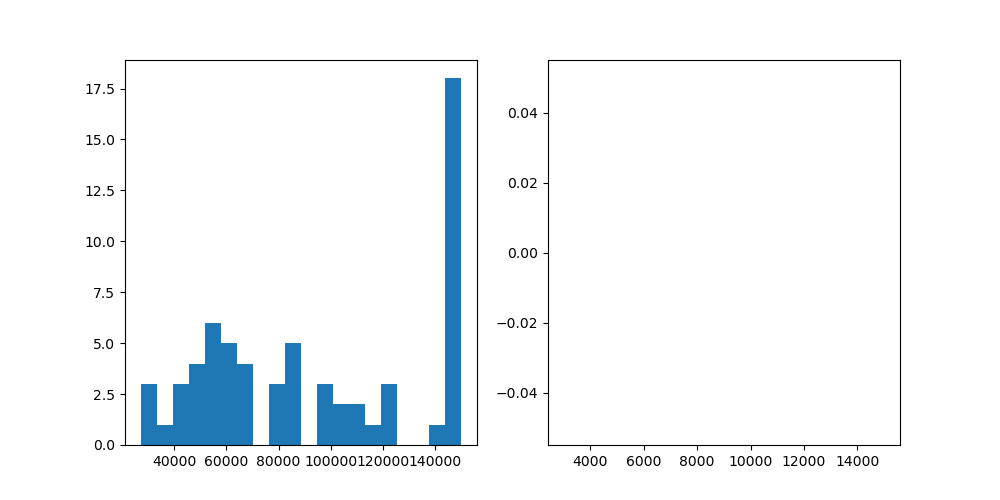

In [364]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(lifetime_df[lifetime_df["lt"] > 0]["lt"], bins =20);
axs[1].hist(lifetime_df[lifetime_df["q0"] > 0]["q0"], bins =np.linspace(3e3,15e3,20));

In [365]:
# Plot the alpha map of

def CorrectLifetime(row, var, q0_max):

    lt = row["lt"]
    time = row["deltaT"]
    q0 = row["q0"]

    if (q0 == 0):
        q_corr = 1
    else:
        q_corr = q0_max/q0


    if (lt == 0):
        return 0
    else:
        return q_corr * row[var] / np.exp(-1*time/lt)

def CorrectLifetimeAvg(row, var, t, mean_lt):

    time = row[t]

    if (mean_lt == 0):
        return 1
    else:
        return row[var] / np.exp(-1*time/mean_lt)



mean_lt = np.mean (lifetime_df[ (lifetime_df["lt"] > 0) & (lifetime_df["lt"] < 100e3)]["lt"])
print("Mean Lifetime is:", mean_lt/1e3, " ms")

data_properties_active_lt = pd.merge(data_properties_active, lifetime_df, on="bin_id", how="left")
q0_max = np.max(data_properties_active_lt.q0)
data_properties_active_lt["S2_areaC"] = data_properties_active_lt.apply(lambda row: CorrectLifetime(row, "S2_area", q0_max), axis=1)
data_properties_active_lt["R"] = np.sqrt(data_properties_active_lt["x"]*data_properties_active_lt["x"] + data_properties_active_lt["y"]*data_properties_active_lt["y"])

data_properties_lt = pd.merge(data_properties, lifetime_df, on="bin_id", how="left")
q0_max = np.max(data_properties_lt.q0)
data_properties_lt["S2_areaC"] = data_properties_lt.apply(lambda row: CorrectLifetime(row,"S2_area", q0_max), axis=1)
data_properties_lt["R"] = np.sqrt(data_properties_lt["x"]*data_properties_lt["x"] + data_properties_lt["y"]*data_properties_lt["y"])

data_properties_lt["cath_areaC"] = data_properties_lt.apply(lambda row: CorrectLifetime(row,"cath_area", q0_max), axis=1)
# data_properties_lt["cath_areaC"] = data_properties_lt.apply(lambda row: CorrectLifetimeAvg(row,"cath_area", "deltaT",  mean_lt), axis=1)

nan_event_ids = data_properties_lt[data_properties_lt['R'].isna()]['event'].values
print(nan_event_ids)

display(data_properties_active_lt)


Mean Lifetime is: 62.64048038657673  ms
[]


,event,S2_area,S2_areafit,S2_time,cath_area,cath_time,cath_std,ts_raw,deltaT,sigma,...,y_bin,x_bin_center,y_bin_center,bin_id,lt,q0,x_center,y_center,S2_areaC,R
0,195806,2314.354133,2359.781441,1608.626517,0.443927,1693.691667,37.807753,1.738347e+09,1217.975,5.795376,...,7,222.222222,333.333333,6_7,54866.066417,20144.083444,222.222222,333.333333,2711.289294,449.977590
1,195813,20169.723504,20698.830224,1606.948799,0.328704,1705.748214,23.134339,1.738347e+09,170.725,2.597777,...,5,444.444444,111.111111,8_5,149999.999999,20063.191962,444.444444,111.111111,23229.873486,415.067255
2,195834,4974.663203,4980.856865,1611.575410,0.290227,1690.197500,34.231627,1.738347e+09,849.900,5.399541,...,1,-333.333333,-333.333333,1_1,149999.999144,20149.396932,-333.333333,-333.333333,5730.796306,452.807118
3,195862,22025.517641,22005.092969,1610.814103,0.165326,1709.157692,32.117278,1.738347e+09,421.700,3.804897,...,6,333.333333,222.222222,7_6,40997.39738,20546.615262,333.333333,222.222222,24998.020802,403.441639
4,195869,19700.741723,19893.031757,1609.012337,0.407471,1691.566667,30.298620,1.738347e+09,208.675,3.073791,...,1,222.222222,-333.333333,6_1,112887.921332,21608.627905,222.222222,-333.333333,21081.951742,435.353375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,88545,1388.002829,1460.825014,1599.670859,0.274391,1700.088281,15.783804,1.738342e+09,538.275,5.297396,...,5,111.111111,111.111111,5_5,150000.0,22693.707015,111.111111,111.111111,1416.759071,197.042194
15360,88552,20830.009041,21102.458765,1608.716641,0.719765,1696.663158,29.859192,1.738342e+09,237.575,2.982145,...,2,-333.333333,-222.222222,1_2,45453.05861,21522.644852,-333.333333,-222.222222,22455.174138,398.402850
15361,88566,21169.197691,21060.282194,1616.412400,0.549807,1699.158065,20.562292,1.738342e+09,1247.325,6.504854,...,4,333.333333,0.000000,7_4,109617.853756,21762.404479,333.333333,0.000000,22708.681586,352.573795
15362,88587,23388.194463,23446.848658,1611.030482,0.574904,1696.348387,24.847797,1.738342e+09,453.450,3.803540,...,6,111.111111,222.222222,5_6,56527.890721,22208.611638,111.111111,222.222222,24502.573295,300.540731


In [366]:
data_properties_active_lt.describe()

,event,S2_area,S2_areafit,S2_time,cath_area,cath_time,cath_std,ts_raw,deltaT,sigma,...,std_interp_amp,ts,x_bin,y_bin,x_bin_center,y_bin_center,x_center,y_center,S2_areaC,R
count,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000,15362.000000,1.536400e+04,15364.000000,15364.000000,...,15364.000000,15364,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000
mean,125070.503385,18334.044000,18578.572793,1611.125747,0.807822,1699.580956,27.079678,1.738344e+09,649.849295,4.613756,...,0.312646,2025-01-31 11:12:24.652362240,4.000911,3.989651,0.101247,-1.149874,0.101247,-1.149874,19488.549049,315.295435
min,2.000000,36.469433,197.107458,1590.550000,-0.023062,1651.764982,0.010992,1.738337e+09,0.675000,0.057001,...,0.005644,2025-01-31 09:22:49.819000,0.000000,0.000000,-444.444444,-444.444444,-444.444444,-444.444444,0.000000,3.680523
25%,62555.750000,18456.596747,18834.427861,1608.177334,0.338096,1693.452768,24.098859,1.738340e+09,304.587500,3.442103,...,0.085702,2025-01-31 10:17:27.472250112,2.000000,2.000000,-222.222222,-222.222222,-222.222222,-222.222222,20759.861890,234.887486
50%,124871.500000,21363.713068,21502.972677,1611.847079,0.555754,1699.565026,27.513961,1.738344e+09,640.337500,4.710733,...,0.102533,2025-01-31 11:11:59.456000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,22896.288025,331.620892
75%,188284.500000,22558.831605,22623.867741,1614.451502,0.854822,1705.877422,30.506037,1.738347e+09,984.256250,5.721828,...,0.285354,2025-01-31 12:07:48.965250048,6.000000,6.000000,222.222222,222.222222,222.222222,222.222222,23701.354764,410.773515
max,250042.000000,34361.444645,127044.723326,1638.175000,85.093007,1739.027806,46.154071,1.738350e+09,1334.875000,17.447159,...,3.395994,2025-01-31 13:02:31.944000,8.000000,8.000000,444.444444,444.444444,444.444444,444.444444,36329.313303,528.806204
std,72137.948919,7308.063311,7402.268136,4.103076,2.447379,9.548323,5.056476,3.800851e+03,387.259868,1.614048,...,0.482613,NaN,2.166144,2.152117,240.682714,239.124056,240.682714,239.124056,8026.068427,111.405667


Text(0, 0.5, 'Y [mm]')

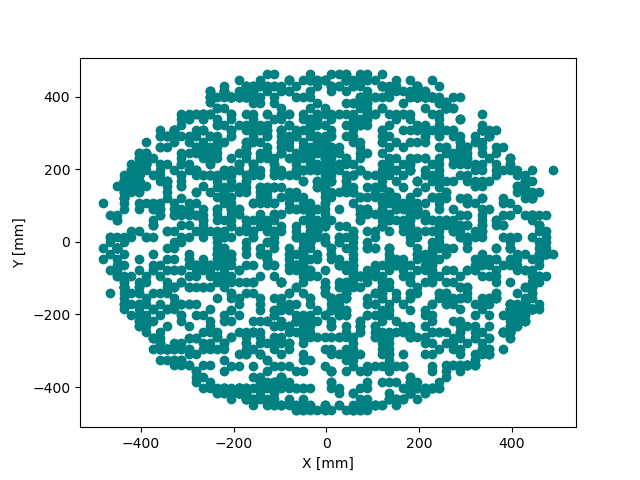

In [367]:
plt.figure()

low_E_S2 = data_properties_active_lt[data_properties_active_lt.S2_areaC < low_charge_lim]
# low_E_S2 = data_properties_active[data_properties_active.S2_area < low_charge_lim]

plt.scatter(low_E_S2.x, low_E_S2.y, color = "Teal")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")

# display(low_E_S2[low_E_S2.R < 200])


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_61641/2790404921.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis").copy()


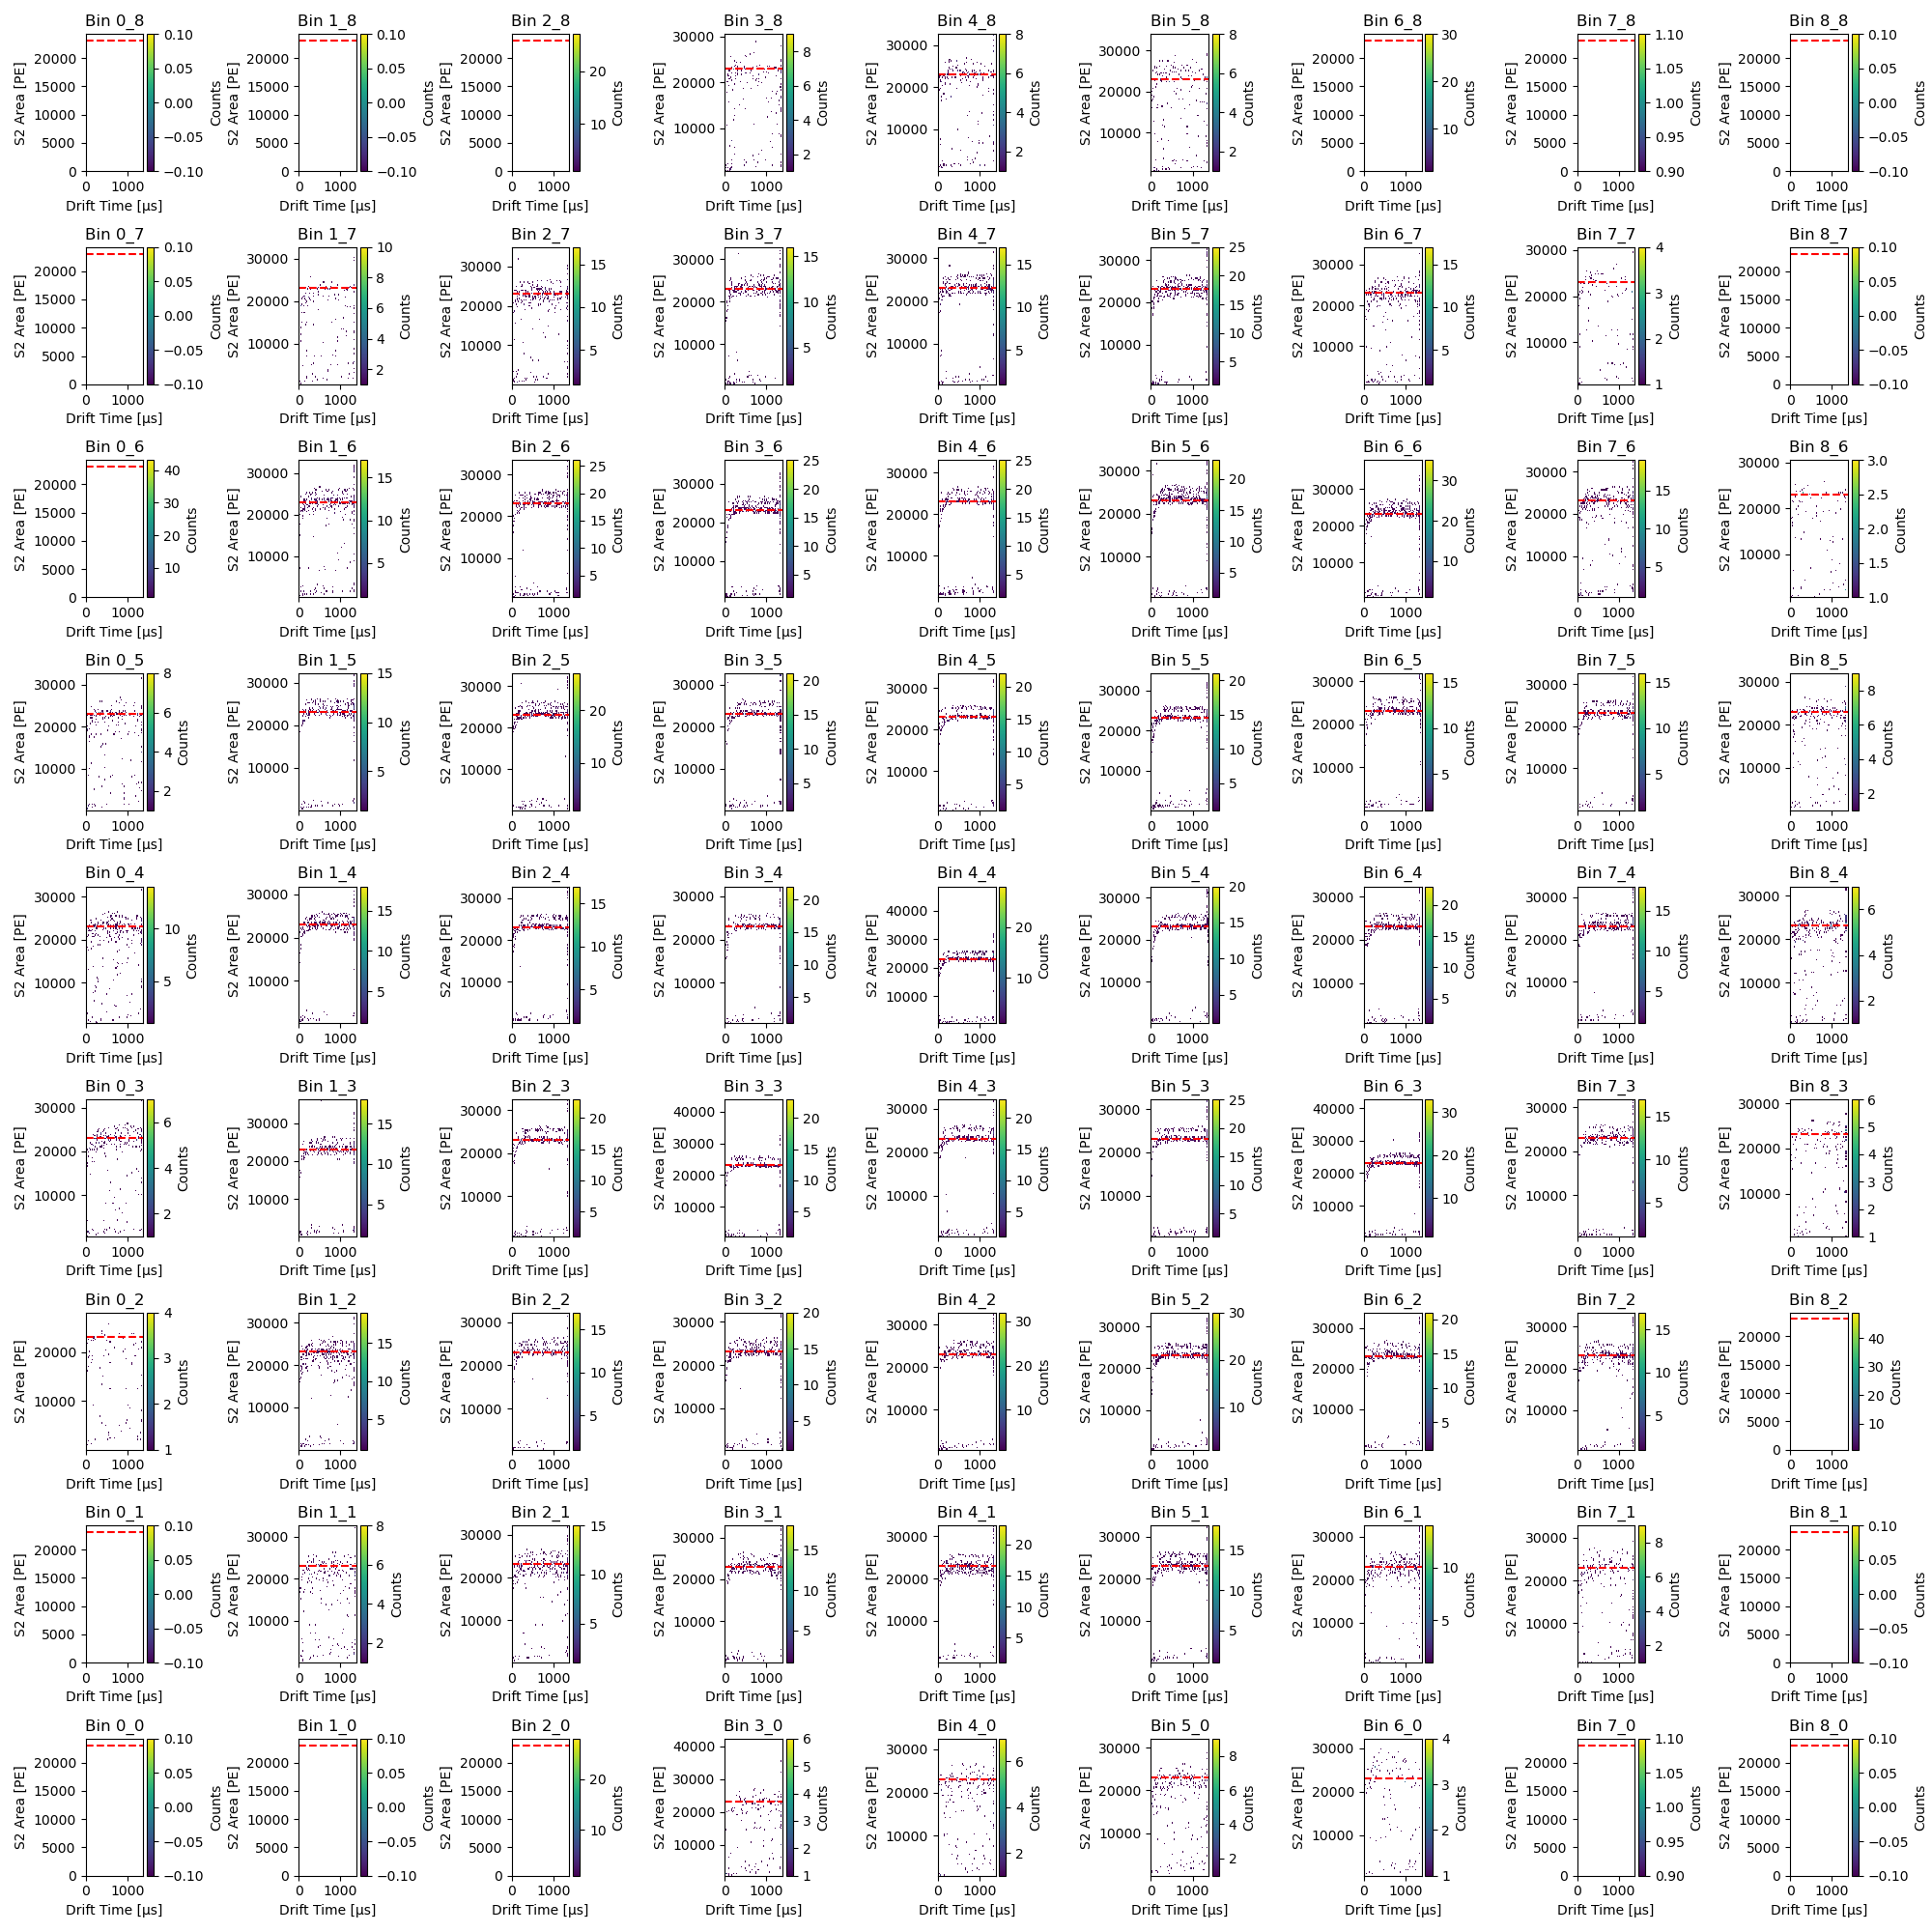

In [368]:
# Create a grid of subplots (5x5)
fig, axs = plt.subplots(nbins-1, nbins-1, figsize=(20, 20))  # Adjusted figsize for better spacing
axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array for easier indexing

# lifetime_df = pd.DataFrame(columns=["bin_id", "lt", "q0"])

# Iterate over the unique bin_id values and corresponding subplot axes
counter = 0
for y in range(nbins-2, -1, -1):
    for x in range(0, nbins-1, 1):
        if counter >= len(axs):
            break  # Avoid indexing beyond available subplots
        plot_lifetime(axs[counter], data_properties_lt, "S2_areaC",f"{x}_{y}")   
        axs[counter].set_xlim(0,cathode_cut+50)
        axs[counter].axhline(y=q0_max, color='r', linestyle='--', linewidth=1.5)
        # axs[counter].set_ylim(2.5e8,5.5e8)

        counter=counter+1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [345]:
# Fit the distribution 
def Gaussian_(x, A, mu, sigma):
    return A * np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

# Line
def Line(x, m, c):
    return m*x+c

23020.623765864373
PE conv factor = 2.4326013304e-04


Text(32064.440245311092, 175, '7.7 MeV')

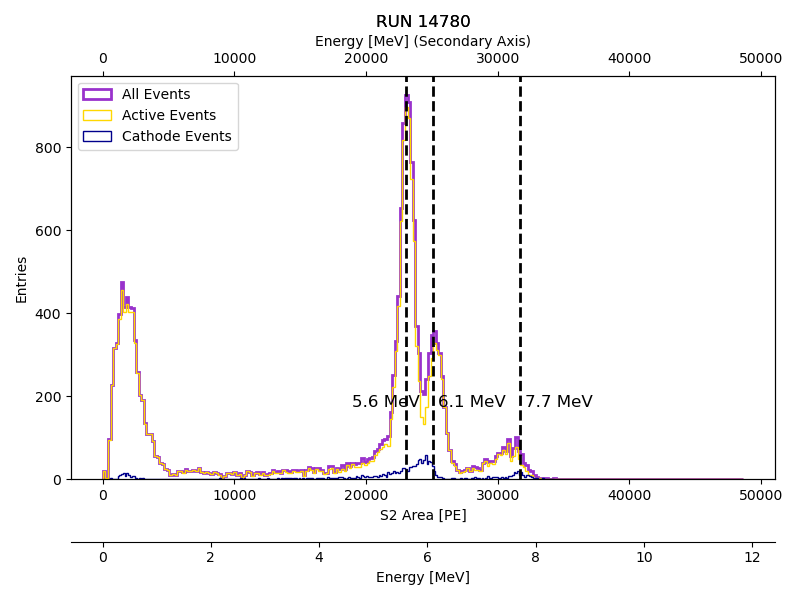

In [369]:
Radial_Cut = 350
# max_bin_shift = 0.025e7

# Histogram the S2 energy
fig, ax1 = plt.subplots(figsize = (8,6))

# data_properties_lt = data_properties_lt[ (data_properties_lt.S2_areaC < 6e7) & (data_properties_lt.S2_areaC > 1e7)]

ax1.hist(data_properties_lt[data_properties_lt.R < Radial_Cut].S2_areaC, bins = 250, histtype = "step", color = "darkorchid", linewidth=2, label = "All Events");
ax1.set_xlabel("S2 Area [PE]")
ax1.set_ylabel("Entries")

# plt.hist(data_properties_active[data_properties_active.cath_area < 50e3].S2_area, bins = 200, histtype = "step");
counts, xbins, _ = ax1.hist(data_properties_lt[(data_properties_lt.deltaT<cathode_cut) & (data_properties_lt.R< Radial_Cut)].S2_areaC, bins = 250, histtype = "step", label="Active Events", color="gold");
ax1.hist(data_properties_lt[(data_properties_lt.deltaT>cathode_cut) & (data_properties_lt.R< Radial_Cut)].S2_areaC, bins = 250, histtype = "step", label="Cathode Events", color="DarkBlue");
ax1.legend(loc="upper left")

bin_centers = (xbins[:-1] + xbins[1:]) / 2


max_bin_shift= bin_centers[0]/2
max_bin_index = np.argmax(counts[:])  # Index of the bin with the most counts
max_bin_value = xbins[max_bin_index]+max_bin_shift

print(max_bin_value)
PE_to_MeV = 5.6/max_bin_value
print(f"PE conv factor = {PE_to_MeV:.10e}")

ax1.set_title(f"RUN {RUN}")

# Create secondary x-axis
ax2 = ax1.twiny()
ax2.set_xlabel("Energy [MeV] (Secondary Axis)")

# Set limits and fewer tick positions for the secondary x-axis
ax2.set_xlim(ax1.get_xlim())


ax2 = ax1.secondary_xaxis("bottom", functions=(lambda x: x * PE_to_MeV, lambda x: x / PE_to_MeV))
ax2.set_xlabel("Energy [MeV]")
ax2.spines['bottom'].set_position(('outward', 45))

fig.tight_layout()

# plt.hist(data_properties_lt[data_properties_lt.R < Radial_Cut].S2_areaC*PE_to_MeV, bins = 1000, histtype = "step", color = "darkorchid", linewidth=2, label = "All Events");
# plt.xlabel("S2 Area [MeV]")
# plt.ylabel("Entries")

# # plt.hist(data_properties_active[data_properties_active.cath_area < 50e3].S2_area, bins = 200, histtype = "step");
# counts, xbins, _ = plt.hist(data_properties_lt[(data_properties_lt.deltaT<794)& (data_properties_lt.R< Radial_Cut)].S2_areaC*PE_to_MeV, bins = 1000, histtype = "step", label="Active Events", color="gold");
# plt.hist(data_properties_lt[(data_properties_lt.deltaT>794) & (data_properties_lt.R< Radial_Cut)].S2_areaC*PE_to_MeV, bins = 1000, histtype = "step", label="Cathode Events", color="DarkBlue");
# plt.legend(loc="upper left")

ax1.axvline(5.6/PE_to_MeV, linestyle = "--", color = "k", linewidth = 2)
ax1.axvline(6.1/PE_to_MeV, linestyle = "--", color = "k", linewidth = 2)
ax1.axvline(7.7/PE_to_MeV, linestyle = "--", color = "k", linewidth = 2)
plt.title(f"RUN {RUN}")

ax1.text(4.6/PE_to_MeV, 175, '5.6 MeV', fontsize=12)
ax1.text(6.2/PE_to_MeV, 175, '6.1 MeV', fontsize=12)
ax1.text(7.8/PE_to_MeV, 175, '7.7 MeV', fontsize=12)

# ax1.set_xlim(1.7e7,2.4e7)
# ax1.set_ylim(0,1000)


,event,S2_area,S2_areafit,S2_time,cath_area,cath_time,cath_std,ts_raw,deltaT,sigma,...,x_bin_center,y_bin_center,bin_id,lt,q0,x_center,y_center,S2_areaC,R,cath_areaC
0,195806,2314.354133,2359.781441,1608.626517,0.443927,1693.691667,37.807753,1.738347e+09,1217.975,5.795376,...,222.222222,333.333333,6_7,54866.066417,20144.083444,222.222222,333.333333,2711.289294,449.977590,0.520065
1,195813,20169.723504,20698.830224,1606.948799,0.328704,1705.748214,23.134339,1.738347e+09,170.725,2.597777,...,444.444444,111.111111,8_5,149999.999999,20063.191962,444.444444,111.111111,23229.873486,415.067255,0.378575
3,195827,20397.146511,20300.702497,1614.934935,1.334998,1704.347368,30.625936,1.738347e+09,1349.775,6.436403,...,222.222222,-222.222222,6_2,150000.0,22224.843084,222.222222,-222.222222,21374.272393,338.059782,1.398951
4,195834,4974.663203,4980.856865,1611.575410,0.290227,1690.197500,34.231627,1.738347e+09,849.900,5.399541,...,-333.333333,-333.333333,1_1,149999.999144,20149.396932,-333.333333,-333.333333,5730.796306,452.807118,0.334340
6,195848,1705.571017,1831.519878,1601.785814,0.200944,1679.340000,28.672040,1.738347e+09,-999.000,5.910342,...,-222.222222,-222.222222,2_2,88229.194057,21907.55589,-222.222222,-222.222222,1776.687660,302.470736,0.209322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,88594,24030.844885,23743.879763,1615.138712,1.321540,1694.473171,24.738663,1.738342e+09,1101.175,5.960261,...,222.222222,-111.111111,6_3,98156.422008,22502.66256,222.222222,-111.111111,24926.420985,251.270484,1.370791
32533,88601,11817.337127,11709.560170,1608.454184,0.136427,1701.202500,26.486644,1.738342e+09,-999.000,3.469786,...,-111.111111,-444.444444,3_0,28922.039182,18895.264247,-111.111111,-444.444444,13944.991724,459.160807,0.160990
32536,88622,23537.787432,23550.537399,1618.316411,1.150429,1702.725000,22.926821,1.738342e+09,-999.000,7.069335,...,444.444444,0.000000,8_4,77181.96591,20153.2728,444.444444,0.000000,26610.400920,445.968375,1.300605
32537,88629,6522.530793,6495.140605,1613.058849,0.542545,1693.613158,19.137281,1.738342e+09,-999.000,6.608150,...,-222.222222,-111.111111,2_3,121159.652702,22556.287136,-222.222222,-111.111111,6619.424847,277.163528,0.550605


0.01986840806087431Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 0.13229391447382777


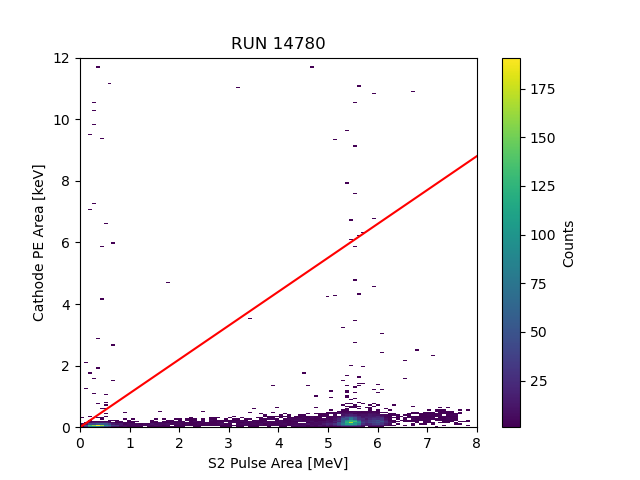

In [370]:
# 1. Create the 2D histogram

data_properties_lt = data_properties_lt[data_properties_lt.grass_peaks < 1]

display(data_properties_lt)

data_properties_lt['S2_area'] = data_properties_lt['S2_area'].fillna(0)
data_properties_lt['cath_area'] = data_properties_lt['cath_area'].fillna(0)

data_properties_lt_radial = data_properties_lt[data_properties_lt.R < 300]

# hist, xedges, yedges = np.histogram2d(data_properties_active.S2_area, data_properties_active.cath_area, bins=100)
hist, xedges, yedges = np.histogram2d(data_properties_lt_radial.S2_area*PE_to_MeV, data_properties_lt_radial.cath_area*PE_to_MeV*1000, bins=[100, 500])

# 2. Mask zero bins
masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

# 3. Create a custom colormap with white for the masked values (zero bins)
cmap = plt.cm.viridis  # Choose a colormap you like
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# 4. Plot the 2D histogram
fig, ax = plt.subplots()
pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

plt.xlabel("S2 Pulse Area [MeV]")
plt.ylabel("Cathode PE Area [keV]")
plt.ylim(0,12)
plt.xlim(0,8)
# plt.ylim(0,2e6*PE_to_MeV*1000)

plt.title(f"RUN {RUN}")

S2_arr = np.linspace(0,10, 100)

# Perform the curve fit
# params, covariance = curve_fit(Line, data_properties_lt_radial.S2_areaC*PE_to_MeV, data_properties_lt_radial.cath_areaC*PE_to_MeV*1000, bounds = ([1e8, 1e3], [4.5e8, 100e3]))
params, covariance = curve_fit(Line, data_properties_lt_radial.S2_area*PE_to_MeV, data_properties_lt_radial.cath_area*PE_to_MeV*1000)

# Extract the fitted parameters
m, c = params

print(m,c)

plt.plot(S2_arr, Line(S2_arr, 1.1, 0), c = "red")


In [371]:


data_properties_lt_copy = data_properties_lt.copy()

data_properties_lt_copy['S2_areaC'] = data_properties_lt_copy['S2_areaC']*PE_to_MeV
data_properties_lt_copy['cath_areaC'] = data_properties_lt_copy['cath_areaC']*PE_to_MeV
data_properties_lt_copy.to_hdf(f"../data/analysis/Properties_Run_{RUN}.h5", key='data_properties_lt', mode='w')


display(data_properties_lt_copy)

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_61641/3291657029.py:5: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['bin_id', 'lt', 'q0'], dtype='object')]

  data_properties_lt_copy.to_hdf(f"../data/analysis/Properties_Run_{RUN}.h5", key='data_properties_lt', mode='w')


,event,S2_area,S2_areafit,S2_time,cath_area,cath_time,cath_std,ts_raw,deltaT,sigma,...,x_bin_center,y_bin_center,bin_id,lt,q0,x_center,y_center,S2_areaC,R,cath_areaC
0,195806,2314.354133,2359.781441,1608.626517,0.443927,1693.691667,37.807753,1.738347e+09,1217.975,5.795376,...,222.222222,333.333333,6_7,54866.066417,20144.083444,222.222222,333.333333,0.659549,449.977590,0.000127
1,195813,20169.723504,20698.830224,1606.948799,0.328704,1705.748214,23.134339,1.738347e+09,170.725,2.597777,...,444.444444,111.111111,8_5,149999.999999,20063.191962,444.444444,111.111111,5.650902,415.067255,0.000092
3,195827,20397.146511,20300.702497,1614.934935,1.334998,1704.347368,30.625936,1.738347e+09,1349.775,6.436403,...,222.222222,-222.222222,6_2,150000.0,22224.843084,222.222222,-222.222222,5.199508,338.059782,0.000340
4,195834,4974.663203,4980.856865,1611.575410,0.290227,1690.197500,34.231627,1.738347e+09,849.900,5.399541,...,-333.333333,-333.333333,1_1,149999.999144,20149.396932,-333.333333,-333.333333,1.394074,452.807118,0.000081
6,195848,1705.571017,1831.519878,1601.785814,0.200944,1679.340000,28.672040,1.738347e+09,-999.000,5.910342,...,-222.222222,-222.222222,2_2,88229.194057,21907.55589,-222.222222,-222.222222,0.432197,302.470736,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,88594,24030.844885,23743.879763,1615.138712,1.321540,1694.473171,24.738663,1.738342e+09,1101.175,5.960261,...,222.222222,-111.111111,6_3,98156.422008,22502.66256,222.222222,-111.111111,6.063604,251.270484,0.000333
32533,88601,11817.337127,11709.560170,1608.454184,0.136427,1701.202500,26.486644,1.738342e+09,-999.000,3.469786,...,-111.111111,-444.444444,3_0,28922.039182,18895.264247,-111.111111,-444.444444,3.392261,459.160807,0.000039
32536,88622,23537.787432,23550.537399,1618.316411,1.150429,1702.725000,22.926821,1.738342e+09,-999.000,7.069335,...,444.444444,0.000000,8_4,77181.96591,20153.2728,444.444444,0.000000,6.473250,445.968375,0.000316
32537,88629,6522.530793,6495.140605,1613.058849,0.542545,1693.613158,19.137281,1.738342e+09,-999.000,6.608150,...,-222.222222,-111.111111,2_3,121159.652702,22556.287136,-222.222222,-111.111111,1.610242,277.163528,0.000134
